In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50, EfficientNetB0, VGG16
from tensorflow.keras.applications import MobileNet, Xception, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import shutil

shutil.copy('/content/drive/MyDrive/cataract.zip', '/content/')

'/content/cataract.zip'

In [ ]:
import os

root_dir = '/content'

if os.path.exists(os.path.join(root_dir, 'cataract')):
  shutil.rmtree(os.path.join(root_dir, 'cataract')) # 디렉토리 제거

In [ ]:
import zipfile

with zipfile.ZipFile(os.path.join(root_dir, 'cataract.zip'), 'r') as f:
  f.extractall(os.path.join(root_dir, 'cataract'))

In [ ]:
# # grayscale 디렉토리 생성
# if not os.path.exists(os.path.join(root_dir, 'gray')):
#   os.mkdir(os.path.join(root_dir, 'gray'))

# if not os.path.exists(os.path.join('/content/gray', 'train')):
#   os.mkdir(os.path.join('/content/gray', 'train'))

# if not os.path.exists(os.path.join('/content/gray/train', 'beginning')):
#   os.mkdir(os.path.join('/content/gray/train', 'beginning'))

# if not os.path.exists(os.path.join('/content/gray/train', 'immature')):
#   os.mkdir(os.path.join('/content/gray/train', 'immature'))

# if not os.path.exists(os.path.join('/content/gray/train', 'mature')):
#   os.mkdir(os.path.join('/content/gray/train', 'mature'))

# if not os.path.exists(os.path.join('/content/gray/train', 'none')):
#   os.mkdir(os.path.join('/content/gray/train', 'none'))

In [ ]:
# # grayscale
# import cv2
# path = '/content/cataract/train'
# label = ['beginning/', 'immature/', 'mature/', 'none/']

# for i in range(4):
#   file_list = os.listdir(os.path.join(path, label[i]))

#   for j in range(len(file_list)): # len(file_list)
#     img = cv2.imread(os.path.join(f'/content/cataract/train/{label[i]}/', file_list[j]), cv2.IMREAD_GRAYSCALE)
#     # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # plt.imshow(img)
#     cv2.imwrite(f'/content/gray/train/{label[i]}/{file_list[j]}_gray.png', img)

# # plt.imshow(img)

In [ ]:
# file_list = os.listdir('/content/gray/train/none')
# len(file_list)

In [ ]:
# # binarization 디렉토리 생성
# if not os.path.exists(os.path.join(root_dir, 'binarization')):
#   os.mkdir(os.path.join(root_dir, 'binarization'))

# if not os.path.exists(os.path.join('/content/binarization', 'train')):
#   os.mkdir(os.path.join('/content/binarization', 'train'))

# if not os.path.exists(os.path.join('/content/binarization/train', 'beginning')):
#   os.mkdir(os.path.join('/content/binarization/train', 'beginning'))

# if not os.path.exists(os.path.join('/content/binarization/train', 'immature')):
#   os.mkdir(os.path.join('/content/binarization/train', 'immature'))

# if not os.path.exists(os.path.join('/content/binarization/train', 'mature')):
#   os.mkdir(os.path.join('/content/binarization/train', 'mature'))

# if not os.path.exists(os.path.join('/content/binarization/train', 'none')):
#   os.mkdir(os.path.join('/content/binarization/train', 'none'))

In [ ]:
# # binarization
# import cv2
# path = '/content/cataract/train'
# label = ['beginning/', 'immature/', 'mature/', 'none/']

# max_output_value = 255
# neighborhood_size = 127
# subtract_from_mean = 10

# for i in range(4):
#   file_list = os.listdir(os.path.join(path, label[i]))

#   for j in range(len(file_list)): # len(file_list)
#     img = cv2.imread(os.path.join(f'/content/cataract/train/{label[i]}/', file_list[j]), cv2.IMREAD_GRAYSCALE)
#     # _, thres = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#     thres = cv2.adaptiveThreshold(img, max_output_value,
#                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
#                                   neighborhood_size, subtract_from_mean)
#     # plt.imshow(thres)
#     cv2.imwrite(f'/content/binarization/train/{label[i]}/{file_list[j]}_binarization.png', thres)

# # plt.imshow(thres)

In [ ]:
# file_list = os.listdir('/content/binarization/train/none')
# len(file_list)

In [ ]:
# Hyperparameter

epoch = 10
batch = 32
learning_rate = 1e-3

In [ ]:
# 랜덤 시드 고정
np.random.seed(123)

train_dir = os.path.join(root_dir, 'cataract/train/')
val_dir = os.path.join(root_dir, 'cataract/train/')
test_dir = os.path.join(root_dir, 'cataract/test/')

# gray_train_dir = os.path.join(root_dir, 'gray/train/')
# gray_val_dir = os.path.join(root_dir, 'gray/train/')

# binarization_train_dir = os.path.join(root_dir, 'binarization/train/')
# binarization_val_dir = os.path.join(root_dir, 'binarization/train/')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  #  featurewise_std_normalization=True, # 인풋을 표준편차로 나눔
                                  #  zoom_range=0.2, # 이미지 확대
                                  #  channel_shift_range=0.1, # 채널 이동 범위
                                  #  rotation_range=20, # 이미지 회전
                                  #  width_shift_range=0.2, # 가로 방향 이동
                                  #  height_shift_range=0.2, # 세로 방향 이동
                                  #  horizontal_flip=True, # 가로 방향으로 이미지 반전
                                   validation_split=0.2)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, # train_dir, gray_train_dir, binarization_train_dir
                                                    batch_size=batch,
                                                    # color_mode='grayscale',
                                                    class_mode='sparse',
                                                    subset='training',
                                                    shuffle=True,
                                                    target_size=(224, 224))

validation_generator = validation_datagen.flow_from_directory(val_dir, # val_dir, gray_val_dir, binarization_val_dir
                                                    batch_size=batch,
                                                    # color_mode='grayscale',
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    target_size=(224, 224))

Found 22023 images belonging to 4 classes.
Found 5504 images belonging to 4 classes.


In [ ]:
# 클래스 확인 '초기', '미성숙', '성숙', '무'
print(train_generator.class_indices)

{'beginning': 0, 'immature': 1, 'mature': 2, 'none': 3}


True Value:  미성숙
(224, 224, 3)


<function matplotlib.pyplot.show(*args, **kw)>

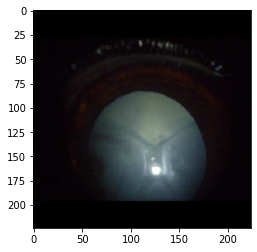

In [ ]:
batch_samples = next(iter(train_generator))
value = ['초기', '미성숙', '성숙', '무']
print('True Value: ', value[int(batch_samples[1][0])])
print(batch_samples[0][0].shape)
plt.imshow(batch_samples[0][0])
plt.show

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg') # 2048

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# base_model.trainable = True
# base_model.trainable = False

In [ ]:
# pretrained

model = Sequential()
model.add(base_model)
# model.add(Flatten())
# model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [ ]:
# # CNN

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(5,5),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)) )

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 27,792,260
Trainable params: 27,739,140
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# if not os.path.exists(os.path.join(root_dir, 'model')):
#   os.mkdir(os.path.join(root_dir, 'model'))
# file_path = '/content/model/{epoch}-{accuracy}-{val-accuracy}.h5'
# cp = ModelCheckpoint(file_path,
#                      monitor='val_accuracy',
#                      verbose=1,
#                      save_best_only=True,
#                      mode='auto')

history=model.fit(train_generator,
                  validation_data=validation_generator,
                  epochs=epoch,
                  # callbacks=[es, reduceLR]
                  )

Epoch 1/10
689/689 [==============================] - 265s 368ms/step - loss: 0.7838 - accuracy: 0.6606 - val_loss: 1.2125 - val_accuracy: 0.4911
Epoch 2/10
689/689 [==============================] - 254s 369ms/step - loss: 0.6221 - accuracy: 0.7199 - val_loss: 0.7147 - val_accuracy: 0.6826
Epoch 3/10
689/689 [==============================] - 254s 369ms/step - loss: 0.5856 - accuracy: 0.7446 - val_loss: 5.6076 - val_accuracy: 0.6303
Epoch 4/10
689/689 [==============================] - 255s 369ms/step - loss: 0.5445 - accuracy: 0.7640 - val_loss: 0.6230 - val_accuracy: 0.7300
Epoch 5/10
689/689 [==============================] - 255s 370ms/step - loss: 0.5031 - accuracy: 0.7876 - val_loss: 1.1359 - val_accuracy: 0.5927
Epoch 6/10
689/689 [==============================] - 254s 369ms/step - loss: 0.4647 - accuracy: 0.8022 - val_loss: 0.6172 - val_accuracy: 0.7289
Epoch 7/10
689/689 [==============================] - 255s 370ms/step - loss: 0.4187 - accuracy: 0.8245 - val_loss: 0.6578 -

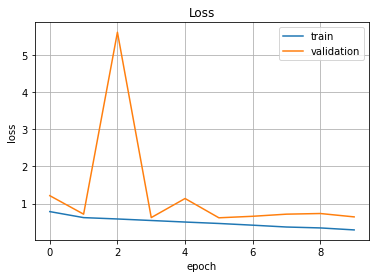

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

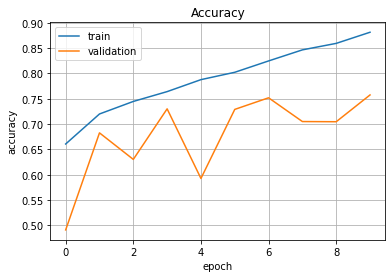

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
eval = model.evaluate(validation_generator)
loss, acc = eval
print(f'acc: {acc:.6f}')
print(f'loss: {loss:.6f}')

172/172 [==============================] - 23s 132ms/step - loss: 0.6416 - accuracy: 0.7574
acc: 0.757449
loss: 0.641609


In [ ]:
import numpy as np

n_img = validation_generator.n
steps = n_img // batch

imgs, labels = [], []
for i in range(steps):
    a, b = validation_generator.next()
    imgs.extend(a)
    labels.extend(b)

imgs = np.asarray(imgs)
labels = np.asarray(labels)

In [ ]:
from sklearn.metrics import classification_report

target = ['초기', '미성숙', '성숙', '무']
pre = model.predict(validation_generator, steps)
pred = np.argmax(pre, axis=1)

print(classification_report(labels, pred, target_names=target))

172/172 [==============================] - 25s 139ms/step
              precision    recall  f1-score   support

          초기       0.68      0.85      0.76      1375
         미성숙       0.59      0.62      0.60      1377
          성숙       0.82      0.57      0.67      1377
           무       0.99      0.99      0.99      1375

    accuracy                           0.76      5504
   macro avg       0.77      0.76      0.76      5504
weighted avg       0.77      0.76      0.76      5504



In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(labels, pred, average='macro')
print(f'f1: {f1:.6f}')

f1: 0.755415


In [ ]:
# model.save('resnet50.h5')